In [13]:
from scipy.stats import pearsonr
import torch


kfac = torch.load("if_analog_scheduler.pt")
for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    name = f"if_analog_scheduler_{t}.pt"
    pca = torch.load(name)
    print("[KFAC (analog) vs KFAC (pca)] pearson:", pearsonr(kfac, pca))


[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=-0.0064257169977792634, pvalue=0.618741096636118)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=-0.0064257169977792634, pvalue=0.618741096636118)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.013204429181025101, pvalue=0.3064770683898601)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.06957773795203742, pvalue=6.856780952728036e-08)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.36371056812379254, pvalue=4.406167381071733e-187)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.5887181540767631, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.6038794428280658, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.6790606092965452, pvalue=0.0)
[KFAC (analog) vs KFAC (pca)] pearson: PearsonRResult(statistic=0.9056330870679052, pvalue=0.0)


In [15]:
pearsonr(kfac, pca).statistic

0.9056330870679052

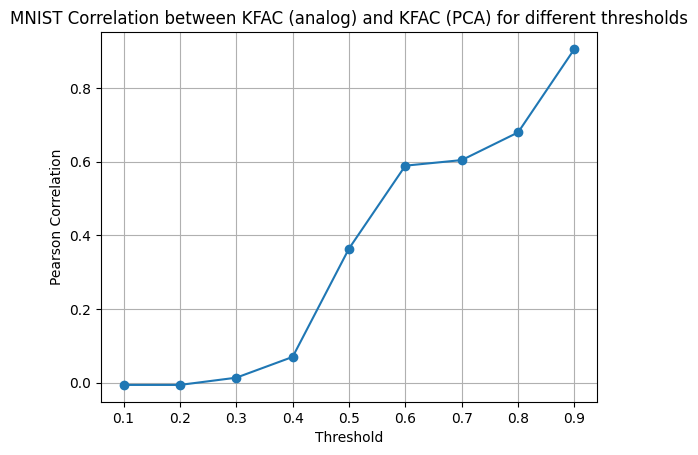

In [14]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("if_analog.pt")
correlation_values = []

for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    name = f"if_analog_scheduler_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

# Plotting
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], correlation_values, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Pearson Correlation')
plt.title('MNIST Correlation between KFAC (analog) and KFAC (PCA) for different thresholds')
plt.grid(True)
plt.show()


In [8]:
kfac_8 = torch.load("if_analog_scheduler.pt")
kfac_8_log = torch.load("if_analog_scheduler_init_from_log_0.8.pt")


In [9]:
pearsonr(kfac_8, kfac_8_log)

PearsonRResult(statistic=0.9999999999999998, pvalue=0.0)

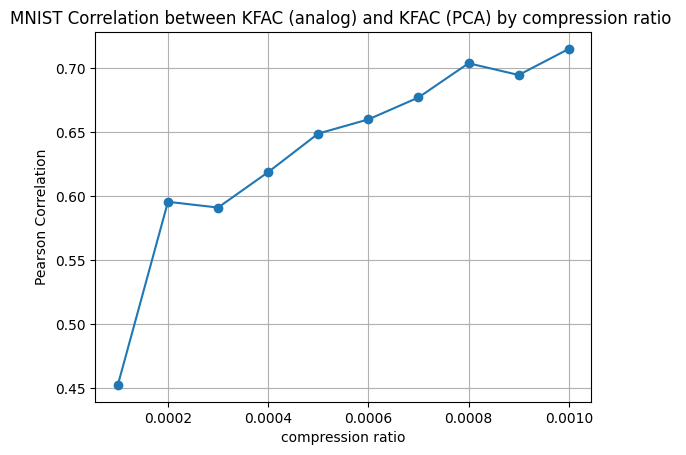

In [2]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("results/if_analog.pt")
correlation_values = []

thres = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008, 0.0009, 0.001]
for t in thres:
    name = f"results/if_analog_scheduler_compress_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

# Plotting
plt.plot(thres, correlation_values, marker='o')
plt.xlabel('compression ratio')
plt.ylabel('Pearson Correlation')
plt.title('MNIST Correlation between KFAC (analog) and KFAC (PCA) by compression ratio ')
plt.grid(True)
plt.show()


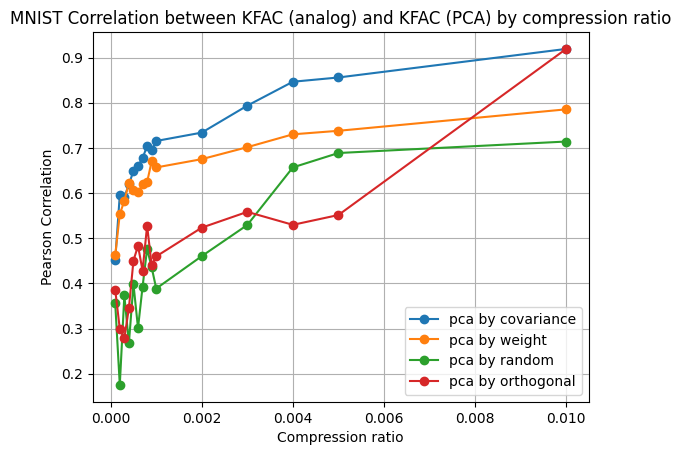

In [19]:
import torch
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

kfac = torch.load("results/if_analog.pt")
correlation_values = []
correlation_values_weight = []  # Initialize an empty list for correlations from weight compressions
correlation_values_random = []
correlation_values_ortho = []

thres = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1]

thres = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
for t in thres:
    name = f"results/if_analog_scheduler_compress_{t}.pt"
    pca = torch.load(name)
    correlation, _ = pearsonr(kfac, pca)
    correlation_values.append(correlation)

    # Load and calculate correlations from weight compressions
    name_weight = f"results/if_analog_weight_compress_{t}.pt"
    pca_weight = torch.load(name_weight)
    correlation_weight, _ = pearsonr(kfac, pca_weight)
    correlation_values_weight.append(correlation_weight)

    # Load and calculate correlations from random compressions
    name_random = f"results/if_analog_random_compress_{t}.pt"
    pca_random = torch.load(name_random)
    correlation_random, _ = pearsonr(kfac, pca_random)
    correlation_values_random.append(correlation_random)

    # Load and calculate correlations from ortho compressions
    name_ortho = f"results/if_analog_orthogonal_compress_{t}.pt"
    pca_ortho = torch.load(name_ortho)
    correlation_ortho, _ = pearsonr(kfac, pca_ortho)
    correlation_values_ortho.append(correlation_ortho)


# Plotting
plt.plot(thres, correlation_values, marker='o', label='pca by covariance')
plt.plot(thres, correlation_values_weight, marker='o', label='pca by weight')
plt.plot(thres, correlation_values_random, marker='o', label='pca by random')
plt.plot(thres, correlation_values_ortho, marker='o', label='pca by orthogonal')

plt.xlabel('Compression ratio')
plt.ylabel('Pearson Correlation')
plt.title('MNIST Correlation between KFAC (analog) and KFAC (PCA) by compression ratio')
plt.grid(True)
plt.legend()
plt.show()
